In [1]:
import numpy as np
import pandas as pd
import functions as f
import missingno as msno
import matplotlib.pyplot as plt
from IPython.display import display

# Datenaufbereitung und Fehleranalyse: user.csv

Dieser Notebook führt eine systematische Datenbereinigung und Fehleranalyse durch:
1. Laden und allgemeine Inspektion der Daten
2. Prüfung und Entfernung von Duplikaten
3. Konvertierung von Datumsangaben
4. Prüfung und Korrektur der Datumsreihenfolge
5. Analyse von user_gender
6. Filterung unrealistischer Altersangaben
7. Prüfung eindeutiger Werte und seltener Einträge
8. Analyse der Abhängigkeit zwischen first_booking_date und destination_country
9. Visualisierung fehlender Werte
10. Zusammenfassung

## 1. Daten laden und allgemeine Inspektion

In [ ]:
# Daten laden
df_user_raw = pd.read_csv('data/new_user_.csv')
df_user = df_user_raw.copy()

rows_initial = len(df_user)
print(f"Anzahl der Zeilen: {rows_initial}")
print(f"Anzahl der Spalten: {len(df_user.columns)}")
print(f"\nSpalten: {list(df_user.columns)}")

Anzahl der Zeilen: 213451
Anzahl der Spalten: 16

Spalten: ['user_id', 'account_created_date', 'first_active_timestamp', 'first_booking_date', 'user_gender', 'user_age', 'signup_platform', 'signup_process', 'user_language', 'marketing_channel', 'marketing_provider', 'first_tracked_affiliate', 'signup_application', 'first_device', 'first_web_browser', 'destination_country']


In [3]:
df_user.head(10)

,user_id,account_created_date,first_active_timestamp,first_booking_date,user_gender,user_age,signup_platform,signup_process,user_language,marketing_channel,marketing_provider,first_tracked_affiliate,signup_application,first_device,first_web_browser,destination_country
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,affiliate,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,FEMALE,38.0,affiliate,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,MALE,56.0,web,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,MALE,42.0,affiliate,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,web,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US
5,osr2jwljor,2010-01-01,20100101215619,2010-01-02,-unknown-,NaN,web,0,en,other,other,omg,Web,Mac Desktop,Chrome,US
6,lsw9q7uk0j,2010-01-02,20100102012558,2010-01-05,MALE,46.0,web,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US
7,0d01nltbrs,2010-01-03,20100103191905,2010-01-13,MALE,47.0,web,0,en,direct,direct,omg,Web,Mac Desktop,Safari,US
8,a1vcnhxeij,2010-01-04,20100104004211,2010-07-29,MALE,50.0,web,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US
9,6uh8zyj2gn,2010-01-04,20100104023758,2010-01-04,-unknown-,46.0,web,0,en,other,craigslist,omg,Web,Mac Desktop,Firefox,US


In [4]:
df_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   user_id                  213451 non-null  object 
 1   account_created_date     213451 non-null  object 
 2   first_active_timestamp   213451 non-null  int64  
 3   first_booking_date       88908 non-null   object 
 4   user_gender              213451 non-null  object 
 5   user_age                 125461 non-null  float64
 6   signup_platform          213451 non-null  object 
 7   signup_process           213451 non-null  int64  
 8   user_language            213451 non-null  object 
 9   marketing_channel        213451 non-null  object 
 10  marketing_provider       213451 non-null  object 
 11  first_tracked_affiliate  207386 non-null  object 
 12  signup_application       213451 non-null  object 
 13  first_device             213451 non-null  object 
 14  firs

In [5]:
df_user.describe()

,first_active_timestamp,user_age,signup_process
count,2.134510e+05,125461.000000,213451.000000
mean,2.013085e+13,49.668335,3.267387
std,9.253717e+09,155.666612,7.637707
min,2.009032e+13,1.000000,0.000000
25%,2.012123e+13,28.000000,0.000000
50%,2.013091e+13,34.000000,0.000000
75%,2.014031e+13,43.000000,0.000000
max,2.014063e+13,2014.000000,25.000000


## 2. Prüfung auf Duplikate

In [6]:
# Ganze Zeilen
num_duplicates = df_user.duplicated().sum()
print(f"Anzahl der Duplikate: {num_duplicates}")

if num_duplicates > 0:
    print(f"\nBeispiele für Duplikate:")
    display(df_user[df_user.duplicated(keep=False)].head())
    
    # Duplikate entfernen
    df_user = df_user.drop_duplicates()
    print(f"\n{num_duplicates} Duplikate wurden entfernt")
    print(f"Neue Anzahl der Zeilen: {len(df_user)}")

Anzahl der Duplikate: 0


In [7]:
# Nur user_id
num_duplicates_user_id = df_user['user_id'].duplicated().sum()
print(f"\nAnzahl der Duplikate in 'user_id': {num_duplicates_user_id}")


Anzahl der Duplikate in 'user_id': 0


## 3. Konvertierung von Datumsangaben

Die Datumsfelder werden in datetime-Format konvertiert:
- `first_active_timestamp` -> datetime (in-place) + neues Feld `first_active_date` (nur Datum)
- `account_created_date` -> datetime (in-place)
- `first_booking_date` -> datetime (in-place)

In [8]:
# Datumskonvertierung
# first_active_timestamp konvertieren und first_active_date erstellen
df_user['first_active_timestamp'] = pd.to_datetime(
    df_user['first_active_timestamp'], 
    format='%Y%m%d%H%M%S', 
    errors='coerce'
)
df_user['first_active_date'] = df_user['first_active_timestamp'].dt.normalize()

# account_created_date konvertieren
df_user['account_created_date'] = pd.to_datetime(
    df_user['account_created_date'], 
    format='%Y-%m-%d', 
    errors='coerce'
)

# first_booking_date konvertieren
df_user['first_booking_date'] = pd.to_datetime(
    df_user['first_booking_date'], 
    format='%Y-%m-%d', 
    errors='coerce'
)

print("Datumsbereiche:")
print(f"  first_active_timestamp: {df_user['first_active_timestamp'].min()} bis {df_user['first_active_timestamp'].max()}")
print(f"  account_created_date: {df_user['account_created_date'].min()} bis {df_user['account_created_date'].max()}")
print(f"  first_booking_date: {df_user['first_booking_date'].min()} bis {df_user['first_booking_date'].max()}")

Datumsbereiche:
  first_active_timestamp: 2009-03-19 04:32:55 bis 2014-06-30 23:58:24
  account_created_date: 2010-01-01 00:00:00 bis 2014-06-30 00:00:00
  first_booking_date: 2010-01-02 00:00:00 bis 2015-06-29 00:00:00


## 4. Prüfung der Datumsreihenfolge

Korrekte Reihenfolge: first_active_date ≤ account_created_date ≤ first_booking_date

Zeilen mit Fehlern werden identifiziert und entfernt.

In [9]:
# Fehlerhafte Datumsreihenfolge identifizieren
# first_active_date > account_created_date
error1 = (df_user['first_active_date'] > df_user['account_created_date'])

# account_created_date > first_booking_date  
error2 = (df_user['first_booking_date'].notna()) & \
         (df_user['account_created_date'] > df_user['first_booking_date'])

# Kombinierte Fehlermaske
date_errors = error1 | error2

num_date_errors = date_errors.sum()
print(f"Anzahl der Zeilen mit fehlerhafter Datumsreihenfolge: {num_date_errors}")
print(f"  - first_active_date > account_created_date: {error1.sum()}")
print(f"  - account_created_date > first_booking_date: {error2.sum()}")

if num_date_errors > 0:
    print(f"\nBeispiele für fehlerhafte Datumsreihenfolge:")
    display(df_user[date_errors][['user_id', 'first_active_date', 'account_created_date', 'first_booking_date']].head())
    
    # Fehlerhafte Zeilen entfernen
    df_user = df_user[~date_errors]
    print(f"\n{num_date_errors} Zeilen mit fehlerhafter Datumsreihenfolge wurden entfernt.")
else:
    print("Keine Fehler in der Datumsreihenfolge gefunden")

Anzahl der Zeilen mit fehlerhafter Datumsreihenfolge: 29
  - first_active_date > account_created_date: 0
  - account_created_date > first_booking_date: 29

Beispiele für fehlerhafte Datumsreihenfolge:


,user_id,first_active_date,account_created_date,first_booking_date
2,4ft3gnwmtx,2009-06-09,2010-09-28,2010-08-02
4,87mebub9p4,2009-12-08,2010-09-14,2010-02-18
120,swrvyedlsp,2010-02-18,2010-05-30,2010-03-17
357,adq42kzmnv,2010-04-05,2010-12-23,2010-04-06
365,176898y1ju,2010-04-06,2011-03-28,2010-04-15



29 Zeilen mit fehlerhafter Datumsreihenfolge wurden entfernt.


## 5. Analyse von user_gender

In [10]:
# Analyse der ursprünglichen Werte in user_gender
print("Ursprüngliche eindeutige Werte in user_gender:")
print(df_user['user_gender'].value_counts(dropna=False))

Ursprüngliche eindeutige Werte in user_gender:
user_gender
-unknown-    95685
MALE         63026
FEMALE       54429
OTHER          282
Name: count, dtype: int64


Der Wert `-unknown-` wird beibehalten, da er die Informationen liefern könnte, dass der Nutzer sein Geschlecht absichtlich nicht angegeben hat.

In [11]:
# Normalisierung: Groß-/Kleinschreibung vereinheitlichen
df_user['user_gender'] = df_user['user_gender'].str.lower()

print("\nBereinigte Werte:")
print(df_user['user_gender'].value_counts(dropna=False))


Bereinigte Werte:
user_gender
-unknown-    95685
male         63026
female       54429
other          282
Name: count, dtype: int64


## 6. Filterung unrealistischer Altersangaben

Zeilen mit user_age < 18 oder > 90 werden entfernt.

In [12]:
# Altersstatistik vor der Bereinigung
print("Altersstatistik vor der Bereinigung:")
print(df_user['user_age'].describe())
print()

# Unrealistische Altersangaben identifizieren
age_too_young = df_user['user_age'] < 18
age_too_old = df_user['user_age'] > 90
invalid_age = age_too_young | age_too_old

num_invalid_age = invalid_age.sum()
print(f"Anzahl der Zeilen mit unrealistischem Alter: {num_invalid_age}")
print(f"  - Alter < 18: {age_too_young.sum()}")
print(f"  - Alter > 90: {age_too_old.sum()}")

Altersstatistik vor der Bereinigung:
count    125435.000000
mean         49.669375
std         155.682665
min           1.000000
25%          28.000000
50%          34.000000
75%          43.000000
max        2014.000000
Name: user_age, dtype: float64

Anzahl der Zeilen mit unrealistischem Alter: 2701
  - Alter < 18: 158
  - Alter > 90: 2543


In [13]:
print(f"\nBeispiele für unrealistische Altersangaben:")
display(df_user[invalid_age][['user_id', 'user_age', 'account_created_date']].head())
    
# Zeilen mit unrealistischem Alter entfernen
df_user = df_user[~invalid_age]
print(f"\n{num_invalid_age} Zeilen mit unrealistischem Alter wurden entfernt")

# Konvertierung von user_age in Integer
df_user['user_age'] = df_user['user_age'].astype('int', errors='ignore')

print("\nAltersstatistik nach der Bereinigung:")
print(df_user['user_age'].describe())


Beispiele für unrealistische Altersangaben:


,user_id,user_age,account_created_date
193,3qsa4lo7eg,5.0,2010-03-06
388,v2x0ms9c62,2014.0,2010-04-11
398,9ouah6tc30,104.0,2010-04-12
482,rzhouzy2ok,5.0,2010-04-29
627,dc3udjfdij,105.0,2010-05-19



2701 Zeilen mit unrealistischem Alter wurden entfernt

Altersstatistik nach der Bereinigung:
count    122734.000000
mean         36.478433
std          11.445447
min          18.000000
25%          28.000000
50%          34.000000
75%          42.000000
max          90.000000
Name: user_age, dtype: float64


## 7. Prüfung eindeutiger Werte in Textspalten

In [14]:
# Definiere die zu analysierenden Spalten
columns_to_analyze = ['user_gender', 'signup_platform', 'signup_process', 'user_language', 
                      'marketing_channel', 'marketing_provider', 'first_tracked_affiliate',
                      'signup_application', 'first_device', 'first_web_browser', 'destination_country']

# Erstelle den Inhalt der Datei
print("Zusammenfassung der eindeutigen Werte pro Spalte in df_user_filtered")
print("=" * 60)
print("")

for column in columns_to_analyze:
    if column in df_user.columns:
        # Zähle eindeutige Werte und deren Häufigkeiten
        value_counts = df_user[column].value_counts()
        total_count = len(df_user)
        
        print(f"Spalte: {column}")
        print(f"Anzahl eindeutiger Werte: {len(value_counts)}")
        print("Wert - Anzahl - Prozent")
        
        for value, count in value_counts.items():
            percentage = (count / total_count) * 100
            print(f"'{value}' - {count} - {percentage:.2f}%")
        
        # NaN-Zählung
        nan_count = df_user[column].isna().sum()
        if nan_count > 0:
            nan_percentage = (nan_count / total_count) * 100
            print(f"NaN - {nan_count} - {nan_percentage:.2f}%")
        
        print("")
        print("-" * 60)
        print("")

Zusammenfassung der eindeutigen Werte pro Spalte in df_user_filtered

Spalte: user_gender
Anzahl eindeutiger Werte: 4
Wert - Anzahl - Prozent
'-unknown-' - 94949 - 45.06%
'male' - 61895 - 29.37%
'female' - 53599 - 25.44%
'other' - 278 - 0.13%

------------------------------------------------------------

Spalte: signup_platform
Anzahl eindeutiger Werte: 3
Wert - Anzahl - Prozent
'web' - 150954 - 71.64%
'affiliate' - 59222 - 28.10%
'search_engine' - 545 - 0.26%

------------------------------------------------------------

Spalte: signup_process
Anzahl eindeutiger Werte: 17
Wert - Anzahl - Prozent
'0' - 162507 - 77.12%
'25' - 14579 - 6.92%
'12' - 9248 - 4.39%
'3' - 8718 - 4.14%
'2' - 6744 - 3.20%
'24' - 4283 - 2.03%
'23' - 2819 - 1.34%
'1' - 1026 - 0.49%
'6' - 296 - 0.14%
'8' - 238 - 0.11%
'21' - 190 - 0.09%
'5' - 35 - 0.02%
'20' - 14 - 0.01%
'16' - 11 - 0.01%
'15' - 10 - 0.00%
'10' - 2 - 0.00%
'4' - 1 - 0.00%

------------------------------------------------------------

Spalte: user_l

In [15]:
# Zähle die Häufigkeit jedes Wertes in 'first_web_browser'
browser_counts = df_user['first_web_browser'].value_counts()

# Identifiziere Werte mit Häufigkeit < 500
rare_browsers = browser_counts[browser_counts < 500].index.tolist()

# Ersetze diese Werte durch 'Other'
df_user['first_web_browser'] = df_user['first_web_browser'].replace(rare_browsers, 'Other')

In [16]:
# Zähle die Häufigkeit jedes Wertes in 'marketing_provider'
provider_counts = df_user['marketing_provider'].value_counts()

# Identifiziere Werte mit Häufigkeit < 100
rare_providers = provider_counts[provider_counts < 100].index.tolist()

# Ersetze diese Werte durch 'other'
df_user['marketing_provider'] = df_user['marketing_provider'].replace(rare_providers, 'other')

## 8. Analyse der Abhängigkeit: first_booking_date ↔ destination_country

Zweiseitige Prüfung:
- Wenn first_booking_date = NaN => destination_country sollte 'NDF' sein
- Wenn destination_country = 'NDF' => first_booking_date sollte NaN sein

In [17]:
# Fall 1: Keine Buchung (first_booking_date = NaN), aber destination != NDF
no_booking_but_dest = (df_user['first_booking_date'].isna()) & \
                       (df_user['destination_country'] != 'NDF')
num_case1 = no_booking_but_dest.sum()

print(f"\n1. Zeilen ohne Buchungsdatum, aber destination_country != 'NDF': {num_case1}")

if num_case1 > 0:
    print("INKONSISTENZ gefunden!")
    print("\n   Beispiele:")
    display(df_user[no_booking_but_dest][['user_id', 'first_booking_date', 'destination_country']].head())
else:
    print("Keine Inkonsistenz")

# Fall 2: Buchung vorhanden (first_booking_date != NaN), aber destination = NDF
booking_but_ndf = (df_user['first_booking_date'].notna()) & \
                   (df_user['destination_country'] == 'NDF')
num_case2 = booking_but_ndf.sum()

print(f"\n2. Zeilen mit Buchungsdatum, aber destination_country = 'NDF': {num_case2}")

if num_case2 > 0:
    print("INKONSISTENZ gefunden!")
    print("\n   Beispiele:")
    display(df_user[booking_but_ndf][['user_id', 'first_booking_date', 'destination_country']].head())
else:
    print("Keine Inkonsistenz")

# Zusammenfassung
print("\n\nZUSAMMENFASSUNG:")
total_inconsistencies = num_case1 + num_case2

if total_inconsistencies == 0:
    print("Die Abhängigkeit zwischen first_booking_date und destination_country ist konsistent")
else:
    print(f"Insgesamt {total_inconsistencies} inkonsistente Zeilen gefunden")

# Statistik
print(f"  - Zeilen ohne Buchungsdatum: {df_user['first_booking_date'].isna().sum()}")
print(f"  - Zeilen mit destination_country = 'NDF': {(df_user['destination_country'] == 'NDF').sum()}")


1. Zeilen ohne Buchungsdatum, aber destination_country != 'NDF': 0
Keine Inkonsistenz

2. Zeilen mit Buchungsdatum, aber destination_country = 'NDF': 0
Keine Inkonsistenz


ZUSAMMENFASSUNG:
Die Abhängigkeit zwischen first_booking_date und destination_country ist konsistent
  - Zeilen ohne Buchungsdatum: 123233
  - Zeilen mit destination_country = 'NDF': 123233


## 9. Visualisierung fehlender Werte

In [18]:
df_nan_analysis = df_user.copy()

# Bereinigung von user_gender
print(f"Zeilen mit unbekanntem user_gender: {(df_nan_analysis['user_gender'] == '-unknown-').sum()}")
df_nan_analysis['user_gender'] = df_nan_analysis['user_gender'].replace('-unknown-', np.nan)

# Bereinigung von first_web_browser
print(f"Zeilen mit unbekanntem first_web_browser: {(df_nan_analysis['first_web_browser'] == '-unknown-').sum()}")
df_nan_analysis['first_web_browser'] = df_nan_analysis['first_web_browser'].replace('-unknown-', np.nan)

Zeilen mit unbekanntem user_gender: 94949
Zeilen mit unbekanntem first_web_browser: 27056


In [19]:
# Fehlende Werte pro Spalte
print("Fehlende Werte pro Spalte:\n")
missing_values = df_nan_analysis.isnull().sum()
missing_percent = round((missing_values / len(df_nan_analysis)) * 100, 2)

missing_df = pd.DataFrame({
    'Spalte': missing_values.index,
    'Anzahl fehlend': missing_values.values,
    'Prozent fehlend': missing_percent.values
})
missing_df = missing_df[missing_df['Anzahl fehlend'] > 0].sort_values('Anzahl fehlend', ascending=False)

if len(missing_df) > 0:
    display(missing_df)
else:
    print("Keine fehlenden Werte gefunden")

Fehlende Werte pro Spalte:



,Spalte,Anzahl fehlend,Prozent fehlend
3,first_booking_date,123233,58.48
4,user_gender,94949,45.06
5,user_age,87987,41.76
14,first_web_browser,27056,12.84
11,first_tracked_affiliate,5990,2.84


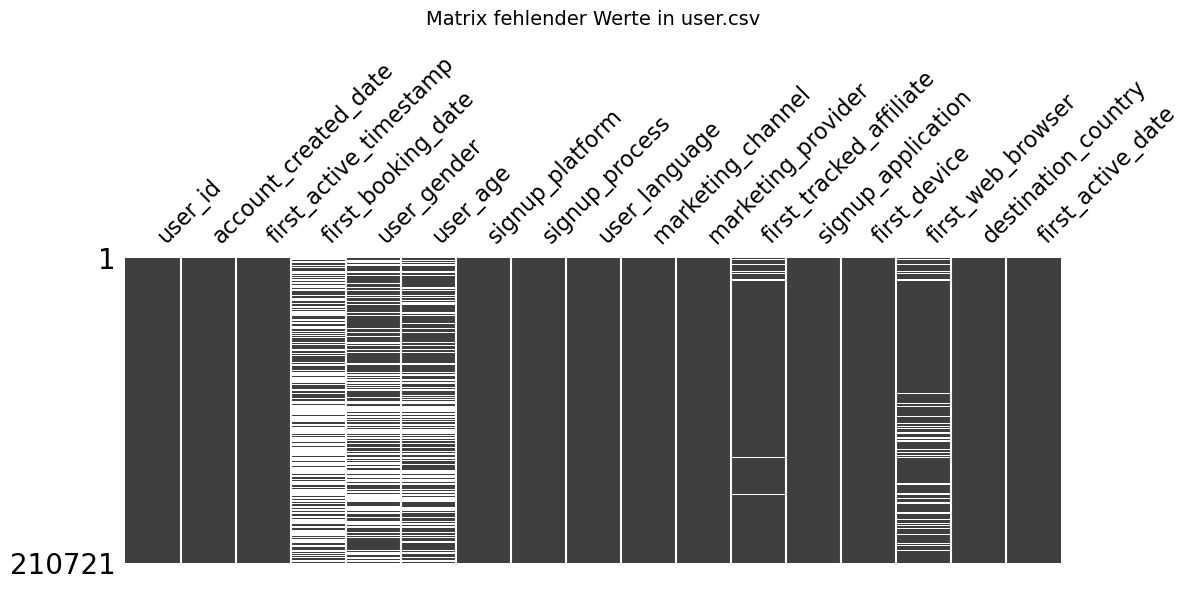

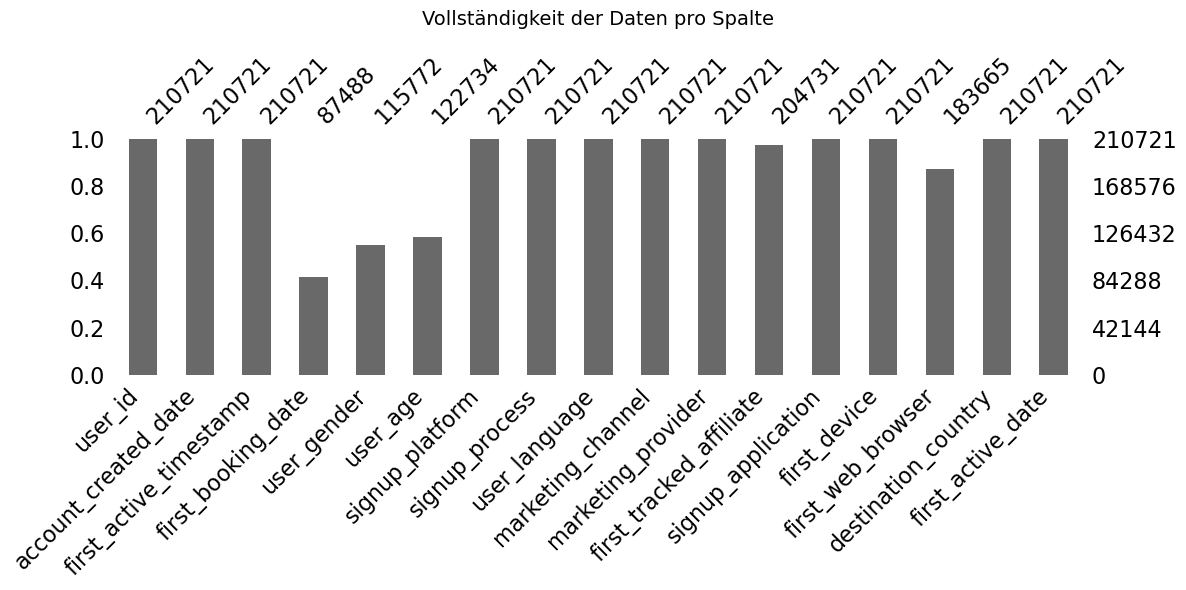

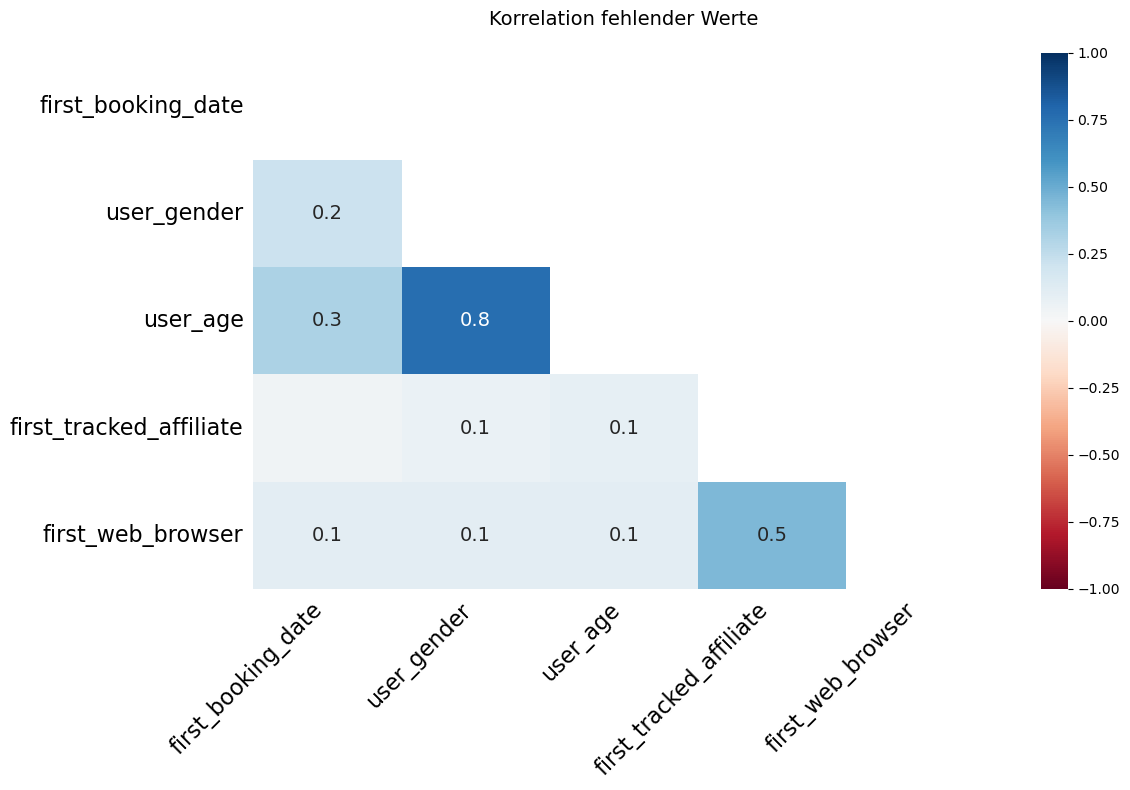

In [20]:
# Visualisierung mit missingno

# Matrix-Plot
msno.matrix(df_nan_analysis, sparkline=False, figsize=(12, 6))
plt.title('Matrix fehlender Werte in user.csv', fontsize=14, pad=20)
plt.tight_layout()
plt.show()
    
# Bar-Plot
msno.bar(df_nan_analysis, figsize=(12, 6))
plt.title('Vollständigkeit der Daten pro Spalte', fontsize=14, pad=20)
plt.tight_layout()
plt.show()
    
# Heatmap-Plot
msno.heatmap(df_nan_analysis, figsize=(12, 8))
plt.title('Korrelation fehlender Werte', fontsize=14, pad=20)
plt.tight_layout()
plt.show()

del df_nan_analysis

## 10. Zusammenfassung

Nach allen Bereinigungsschritten:

In [21]:
print(f"\nUrsprüngliche Anzahl der Zeilen: {rows_initial}")
print(f"Finale Anzahl der Zeilen: {len(df_user)}")
print(f"Entfernte Zeilen gesamt: {rows_initial - len(df_user)} ({((rows_initial - len(df_user)) / rows_initial * 100):.2f}%)")
print(f"Anzahl der Spalten: {len(df_user.columns)}")

print(f"\nDatentypen:")
df_user.info()


Ursprüngliche Anzahl der Zeilen: 213451
Finale Anzahl der Zeilen: 210721
Entfernte Zeilen gesamt: 2730 (1.28%)
Anzahl der Spalten: 17

Datentypen:
<class 'pandas.core.frame.DataFrame'>
Index: 210721 entries, 0 to 213450
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   user_id                  210721 non-null  object        
 1   account_created_date     210721 non-null  datetime64[ns]
 2   first_active_timestamp   210721 non-null  datetime64[ns]
 3   first_booking_date       87488 non-null   datetime64[ns]
 4   user_gender              210721 non-null  object        
 5   user_age                 122734 non-null  float64       
 6   signup_platform          210721 non-null  object        
 7   signup_process           210721 non-null  int64         
 8   user_language            210721 non-null  object        
 9   marketing_channel        210721 non-null  object        
 1

Speicherung der Analyse in txt-Datei:

In [22]:
# Definiere die zu analysierenden Spalten
columns_to_analyze = ['user_gender', 'signup_platform', 'signup_process', 'user_language', 
                      'marketing_channel', 'marketing_provider', 'first_tracked_affiliate',
                      'signup_application', 'first_device', 'first_web_browser', 'destination_country']

f.save_unique_values_summary(df_user, columns_to_analyze, 'user')

Datei erfolgreich gespeichert: outputs/user_unique_values_summary.txt


Exportieren:

In [23]:
df_user.to_parquet('data/user_filtered.parquet', index=False)
print("df_user erfolgreich in 'data/user_filtered.parquet' exportiert")

df_user erfolgreich in 'data/user_filtered.parquet' exportiert
